In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [52]:
#Create a path to where your data is stored.
path = r'D:\WORK\Bootcamp\Machine Learning\Achievement 1\Project\Data'

#Read in the European weather data.

# Read the CSV file
df = pd.read_csv(os.path.join(path, "Original", 'Dataset-weather-prediction-dataset-processed.csv'))
df_ans = pd.read_csv(os.path.join(path, "Original", 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [53]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)

In [54]:
df_ans.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [55]:
df_ans.head(10)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,19600106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,19600107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,19600108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,19600109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,19600110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df_ans.shape

(22950, 16)

In [57]:
# Extract bases from df (columns ending with '_humidity')
bases_in_df = {col.split('_')[0] for col in df.columns if col.endswith('_humidity')}

# Extract bases from df_ans (columns ending with '_pleasant_weather')
bases_in_df_ans = {col.split('_')[0] for col in df_ans.columns if col.endswith('_pleasant_weather')}

# Find the missing "bases" in df_ans
missing_bases = bases_in_df - bases_in_df_ans

# Print the result
print("Missing bases in df_ans:", missing_bases)

Missing bases in df_ans: {'ROMA', 'GDANSK', 'TOURS'}


In [58]:
# Drop columns in df_ans that start with any missing base
columns_to_drop = [col for col in df.columns if any(col.startswith(base) for base in missing_bases)]

# Drop these columns from df_ans
df = df.drop(columns=columns_to_drop)

# Print confirmation
print(f"Columns dropped: {columns_to_drop}")

columns_to_drop

Columns dropped: ['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean', 'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max']


['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max']

In [59]:
df.head(10)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
5,19600106,1,1,2.1,0.78,1.018,0.76,0.00,0,7.7,...,5,0.76,1.0326,0.33,0.00,0,0.9,4.1,-0.6,8.7
6,19600107,1,3,2.1,0.87,1.018,0.66,0.00,0,5.4,...,7,0.73,1.0230,0.42,0.00,0,2.2,7.9,4.4,11.4
7,19600108,1,8,2.1,0.95,1.018,0.19,0.09,0,0.0,...,2,0.72,1.0203,0.50,0.00,0,6.2,8.5,6.7,10.3
8,19600109,1,8,2.1,0.98,1.018,0.19,0.56,0,0.0,...,5,0.67,1.0243,0.14,0.00,0,0.1,6.8,5.8,7.8
9,19600110,1,3,2.1,0.74,1.018,0.38,0.01,5,1.1,...,1,0.66,1.0307,0.49,0.00,0,6.4,1.8,0.2,5.0


In [60]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [61]:
# Filter columns that end with '_temp_mean' or are 'DATE' or 'MONTH'
columns_to_keep = [col for col in df.columns if col.endswith('_temp_mean') or col in ['DATE', 'MONTH']]
df = df[columns_to_keep]

# Print the remaining columns
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['DATE', 'MONTH', 'BASEL_temp_mean', 'BELGRADE_temp_mean', 'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean', 'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean', 'MUNCHENB_temp_mean', 'OSLO_temp_mean', 'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean', 'VALENTIA_temp_mean']


In [62]:
df

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,1,6.5,3.7,2.4,9.3,10.0,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,-5.9,4.2,8.5
1,19600102,1,6.1,2.9,2.3,7.7,8.2,6.1,7.7,2.1,8.6,9.8,6.2,3.4,-9.5,4.0,8.9
2,19600103,1,8.5,3.1,2.7,6.8,7.1,8.4,6.5,4.6,6.9,8.6,5.8,1.9,-9.5,2.4,10.5
3,19600104,1,6.3,2.0,2.0,6.7,6.8,9.4,5.8,3.2,7.0,10.3,3.9,3.0,-11.5,1.2,7.4
4,19600105,1,3.0,2.0,2.5,8.0,7.7,8.9,5.4,3.6,8.1,12.1,1.8,3.7,-9.3,3.3,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,15.9,18.2,11.7,15.7,17.8,16.4,9.1,14.7,18.6,20.0,14.3,9.7,0.6,11.5,10.7
22946,20221028,10,16.7,15.9,11.7,16.0,19.4,15.8,9.1,12.9,18.9,19.1,16.1,10.9,2.3,12.5,10.7
22947,20221029,10,16.7,13.4,11.7,15.8,18.2,16.5,9.1,13.2,18.2,19.0,17.4,9.7,3.3,13.1,10.7
22948,20221030,10,15.4,15.0,11.7,14.4,16.7,15.2,9.1,14.0,16.3,15.7,14.5,5.9,3.4,7.5,10.7


In [63]:
df_ans

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
# Find the number of unique values in each column
unique_counts = df_ans.nunique()

# Display the result
print(unique_counts)


DATE                           22950
BASEL_pleasant_weather             2
BELGRADE_pleasant_weather          2
BUDAPEST_pleasant_weather          2
DEBILT_pleasant_weather            2
DUSSELDORF_pleasant_weather        2
HEATHROW_pleasant_weather          2
KASSEL_pleasant_weather            2
LJUBLJANA_pleasant_weather         2
MAASTRICHT_pleasant_weather        2
MADRID_pleasant_weather            2
MUNCHENB_pleasant_weather          2
OSLO_pleasant_weather              2
SONNBLICK_pleasant_weather         1
STOCKHOLM_pleasant_weather         2
VALENTIA_pleasant_weather          2
dtype: int64


In [65]:
# Find the unique values in each column
unique_values = {col: df_ans[col].unique() for col in df_ans.columns}

# Display the unique values
for column, values in unique_values.items():
    print(f"Column '{column}': {values}")


Column 'DATE': [19600101 19600102 19600103 ... 20221029 20221030 20221031]
Column 'BASEL_pleasant_weather': [0 1]
Column 'BELGRADE_pleasant_weather': [0 1]
Column 'BUDAPEST_pleasant_weather': [0 1]
Column 'DEBILT_pleasant_weather': [0 1]
Column 'DUSSELDORF_pleasant_weather': [0 1]
Column 'HEATHROW_pleasant_weather': [0 1]
Column 'KASSEL_pleasant_weather': [0 1]
Column 'LJUBLJANA_pleasant_weather': [0 1]
Column 'MAASTRICHT_pleasant_weather': [0 1]
Column 'MADRID_pleasant_weather': [0 1]
Column 'MUNCHENB_pleasant_weather': [0 1]
Column 'OSLO_pleasant_weather': [0 1]
Column 'SONNBLICK_pleasant_weather': [0]
Column 'STOCKHOLM_pleasant_weather': [0 1]
Column 'VALENTIA_pleasant_weather': [0 1]


In [66]:
# Find rows with 1 in each column
rows_with_1 = df_ans[df_ans.eq(1).all(axis=1)]

# Display the result
print(rows_with_1)


Empty DataFrame
Columns: [DATE, BASEL_pleasant_weather, BELGRADE_pleasant_weather, BUDAPEST_pleasant_weather, DEBILT_pleasant_weather, DUSSELDORF_pleasant_weather, HEATHROW_pleasant_weather, KASSEL_pleasant_weather, LJUBLJANA_pleasant_weather, MAASTRICHT_pleasant_weather, MADRID_pleasant_weather, MUNCHENB_pleasant_weather, OSLO_pleasant_weather, SONNBLICK_pleasant_weather, STOCKHOLM_pleasant_weather, VALENTIA_pleasant_weather]
Index: []


# ANN

In [67]:
#Create an 'X' and y df by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = df_ans.drop(['DATE'],axis=1)

In [68]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [69]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


In [71]:
X_train[:10]

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
8196,20.4,22.5,22.5,16.3,18.8,15.8,17.1,19.2,17.7,24.8,19.1,10.5,2.3,8.5,15.6
20472,-1.8,-3.6,-3.3,-2.5,-3.6,1.3,9.1,-4.4,-3.8,5.8,-4.8,-11.2,-17.4,-6.9,10.7
18269,-1.8,3.2,-0.4,-4.9,-5.4,-2.8,-6.2,0.6,-6.1,2.1,-2.4,-14.4,-14.1,-8.3,1.0
7713,-1.4,0.7,1.5,0.2,-0.7,2.4,-2.9,-0.4,-1.0,2.3,-4.2,-6.5,-20.9,-2.2,6.8
21958,6.1,6.7,6.2,5.7,5.0,7.2,9.1,6.6,5.9,11.0,5.2,0.6,-14.7,1.0,10.7
11464,18.3,18.7,18.7,12.1,13.6,16.6,13.4,19.1,13.9,18.8,18.3,11.4,-2.6,10.0,13.1
3984,3.7,4.4,4.7,5.2,6.9,10.4,2.8,1.4,7.0,13.2,-2.0,-2.1,-2.6,1.1,10.9
4752,-3.9,0.5,2.1,2.3,2.3,8.8,0.0,0.8,3.2,6.5,-2.1,-0.4,-10.3,1.3,10.5
11092,15.7,21.3,20.6,13.5,16.0,17.3,13.8,18.3,14.8,19.2,14.5,12.8,-0.7,11.9,12.6
21377,18.8,23.6,21.6,19.0,20.4,19.4,9.1,19.6,20.3,26.8,18.2,21.5,4.4,20.0,10.7


In [72]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11408523  1.26048221  0.98510239  1.18267178  0.79366897
   1.16696642  1.02406684  1.12530567  1.32713725  1.26235516  0.49003378
   1.0719053   0.14041372  1.45475014]
 [-1.65254457 -1.84706463 -1.77256635 -1.98055572 -2.10946465 -1.72667839
  -0.01359355 -1.83095876 -2.09029531 -1.23266439 -1.73566519 -2.14158559
  -1.80450767 -1.77299837 -0.0139084 ]
 [-1.65254457 -1.07557731 -1.43164228 -2.35915038 -2.37401133 -2.43932834
  -2.27141449 -1.22608045 -2.43428984 -1.73115208 -1.43460876 -2.5296585
  -1.322672   -1.94694492 -2.92125284]
 [-1.59839734 -1.35921235 -1.20827824 -1.55463674 -1.68325056 -1.53547963
  -1.78443351 -1.34705611 -1.67151937 -1.7042068  -1.66040109 -1.57160352
  -2.31554551 -1.18903494 -1.1828407 ]
 [-0.58313666 -0.67848825 -0.65574614 -0.68702399 -0.84551941 -0.70115774
  -0.01359355 -0.50022649 -0.6395358  -0.5320871  -0.48126337 -0.71056677
  -1.41027848 -0.79144282 -0.0139084 ]
 [ 1.06835403  0.68295996  0.81375413  0.32256175  0.41842582  0.9

In [73]:
#Note the features all have a mean of zero and a standard deviation of one.

In [74]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

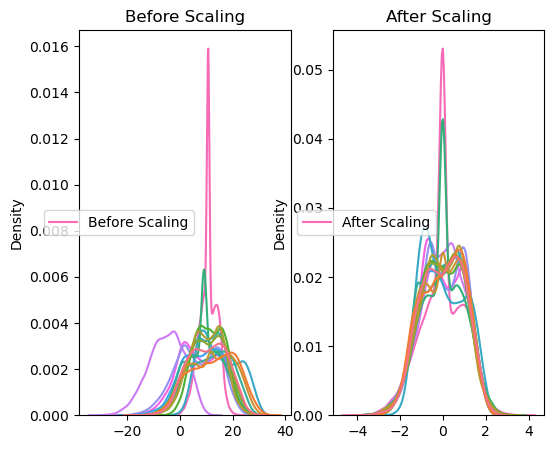

In [75]:
#Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.legend(['Before Scaling'], loc='center left', bbox_to_anchor=(-0.2, 0.5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)
ax1.legend(['Before Scaling'], loc='center left', bbox_to_anchor=(-0.2, 0.5))

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df, ax=ax2)
ax2.legend(['After Scaling'], loc='center left', bbox_to_anchor=(-0.2, 0.5))

plt.show()

In [76]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [77]:
#The ANN has not yet converged on an answer. Let's see how accurate it is.

In [78]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.43754357425052287
0.442140118508191


# Matrix 1

In [117]:
print(y_pred_test.shape)
print(y_test.shape)
print(y_pred.shape)
print(y_train.shape)

(5738, 15)
(5738, 15)
(17212, 15)
(17212, 15)


In [80]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


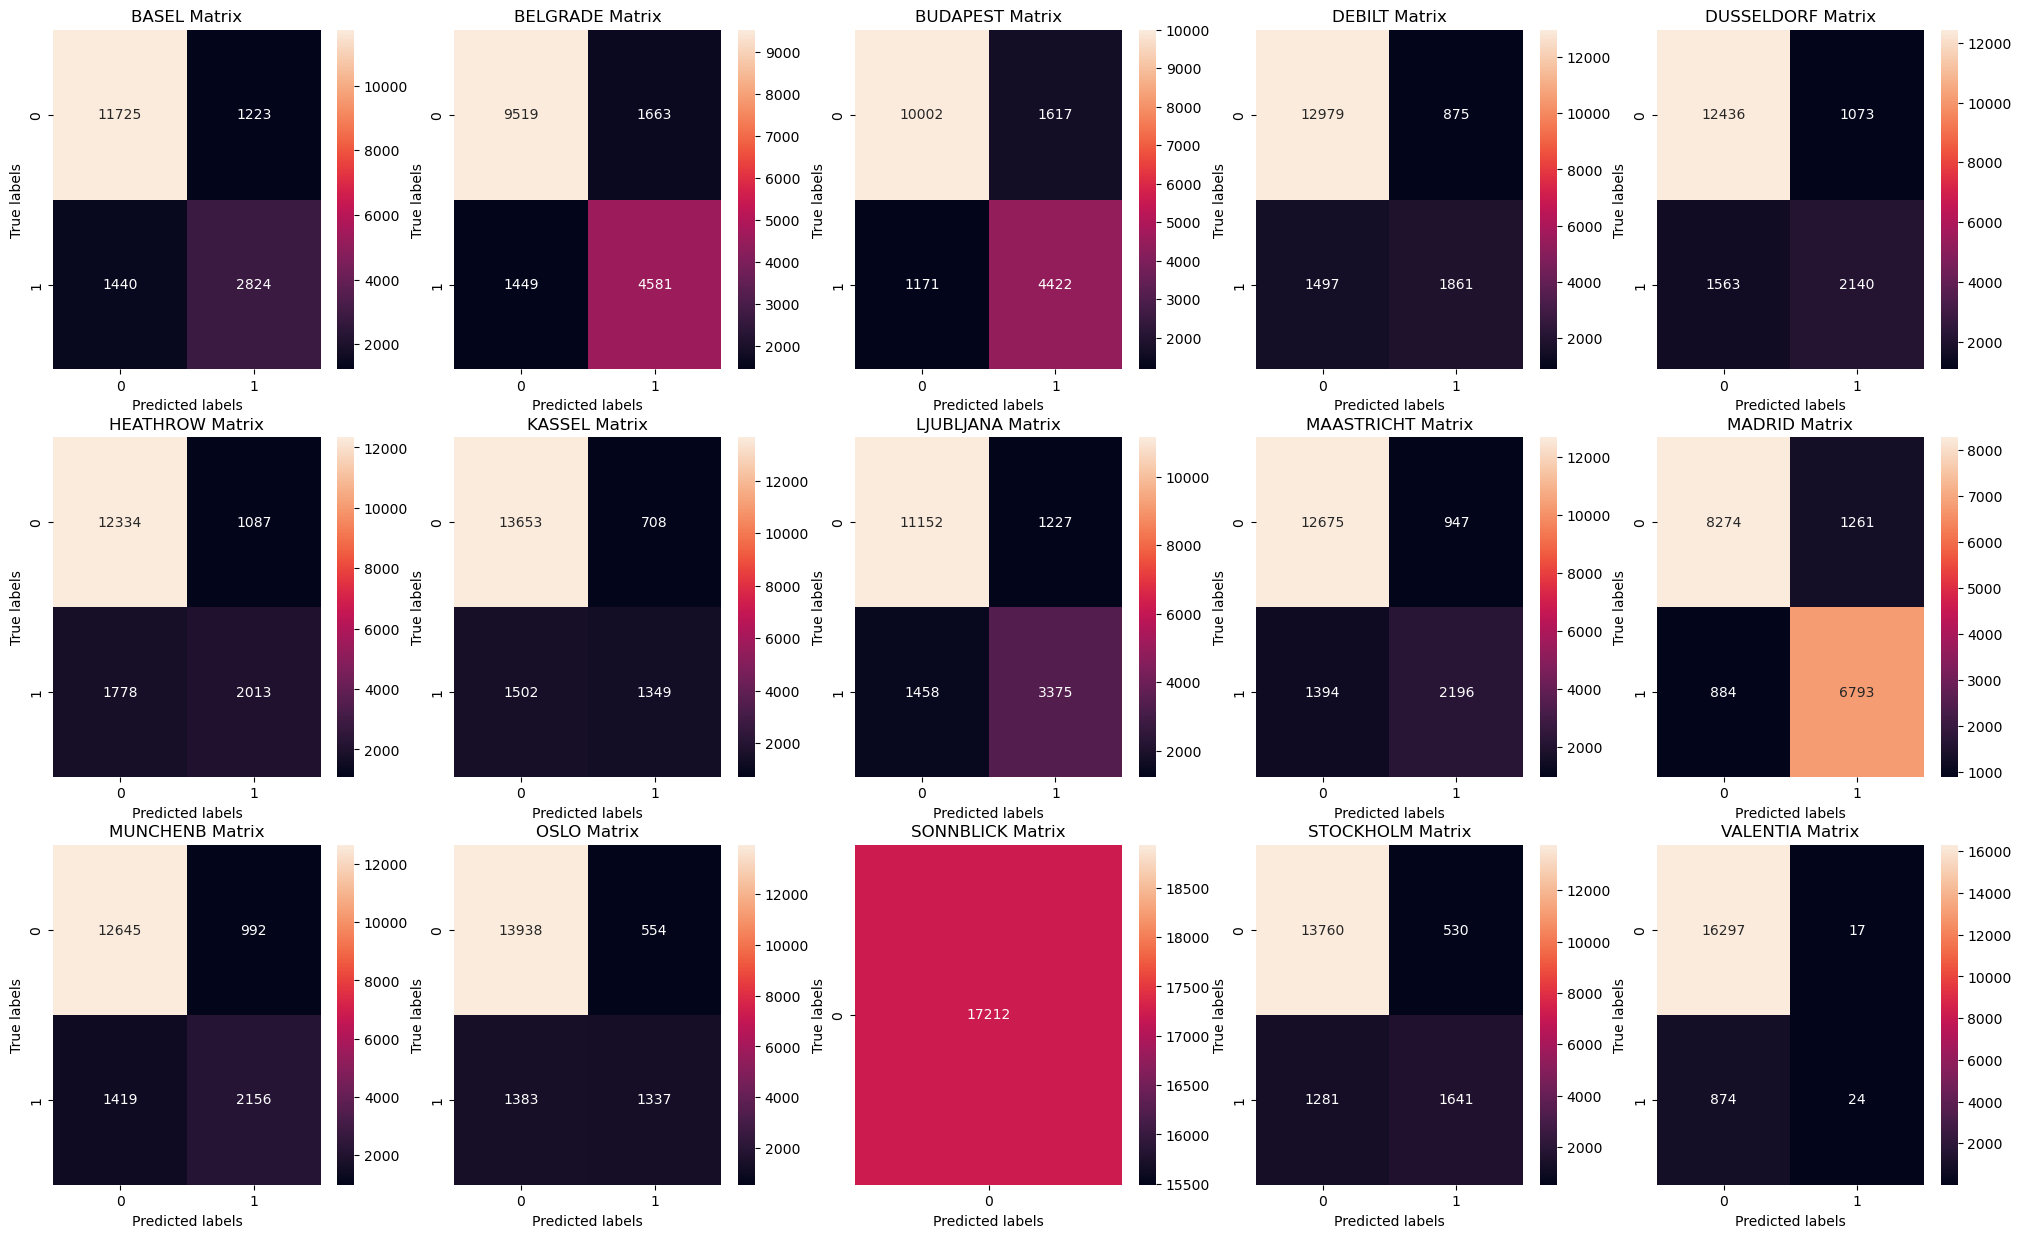

In [84]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


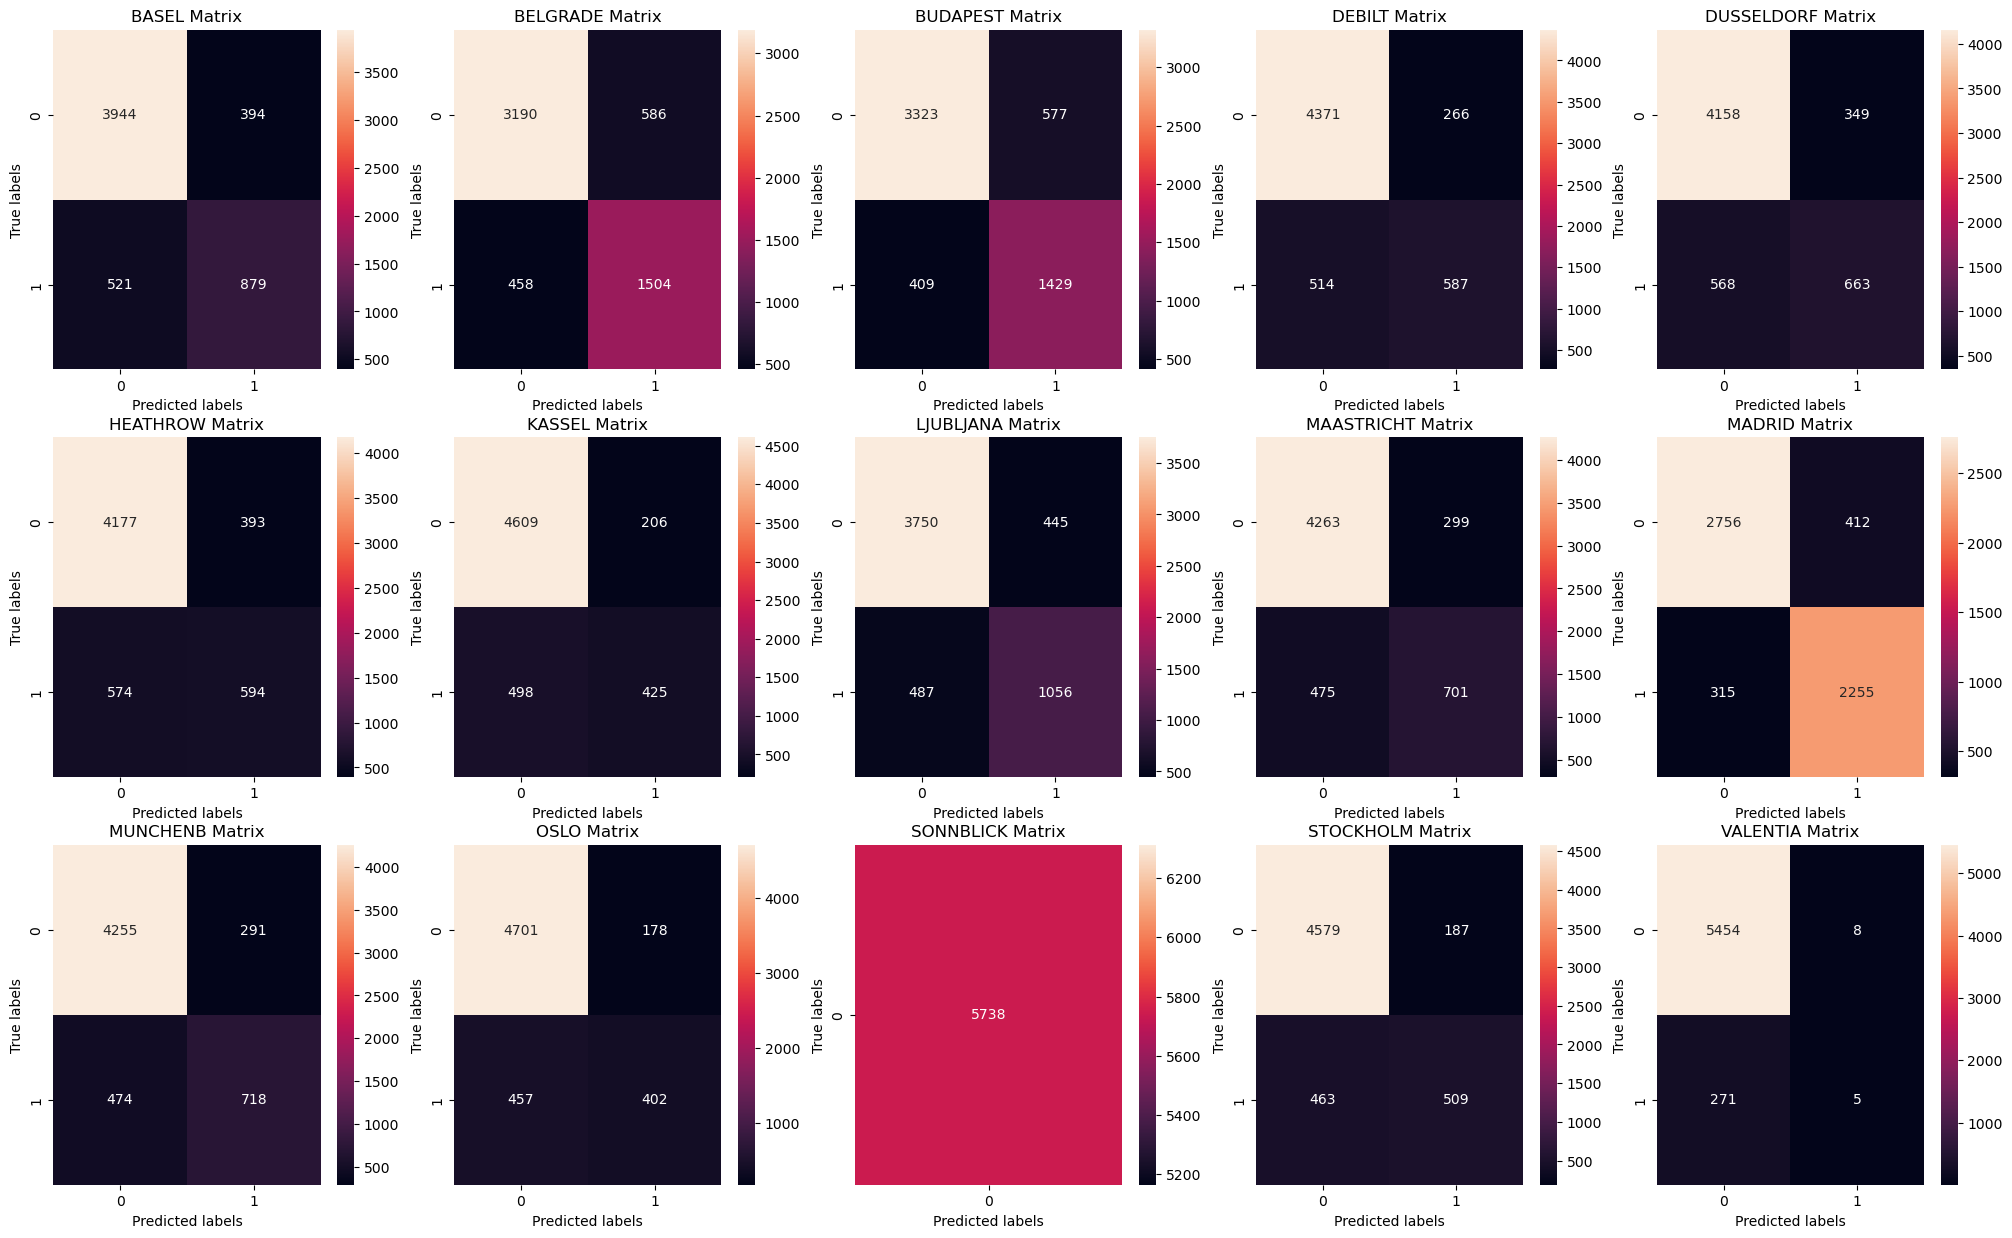

In [85]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

# ANN 2

In [121]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=100, tol=0.001)
#Fit the data to the model
mlp.fit(X_train, y_train)

c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=100, tol=0.001)

In [122]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4764118057169417
0.45189961659114675


In [123]:
#Better, But still not great

# Matrix 2

In [124]:
print(y_pred_test.shape)
print(y_test.shape)
print(y_pred.shape)
print(y_train.shape)

(5738, 15)
(5738, 15)
(17212, 15)
(17212, 15)


In [125]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


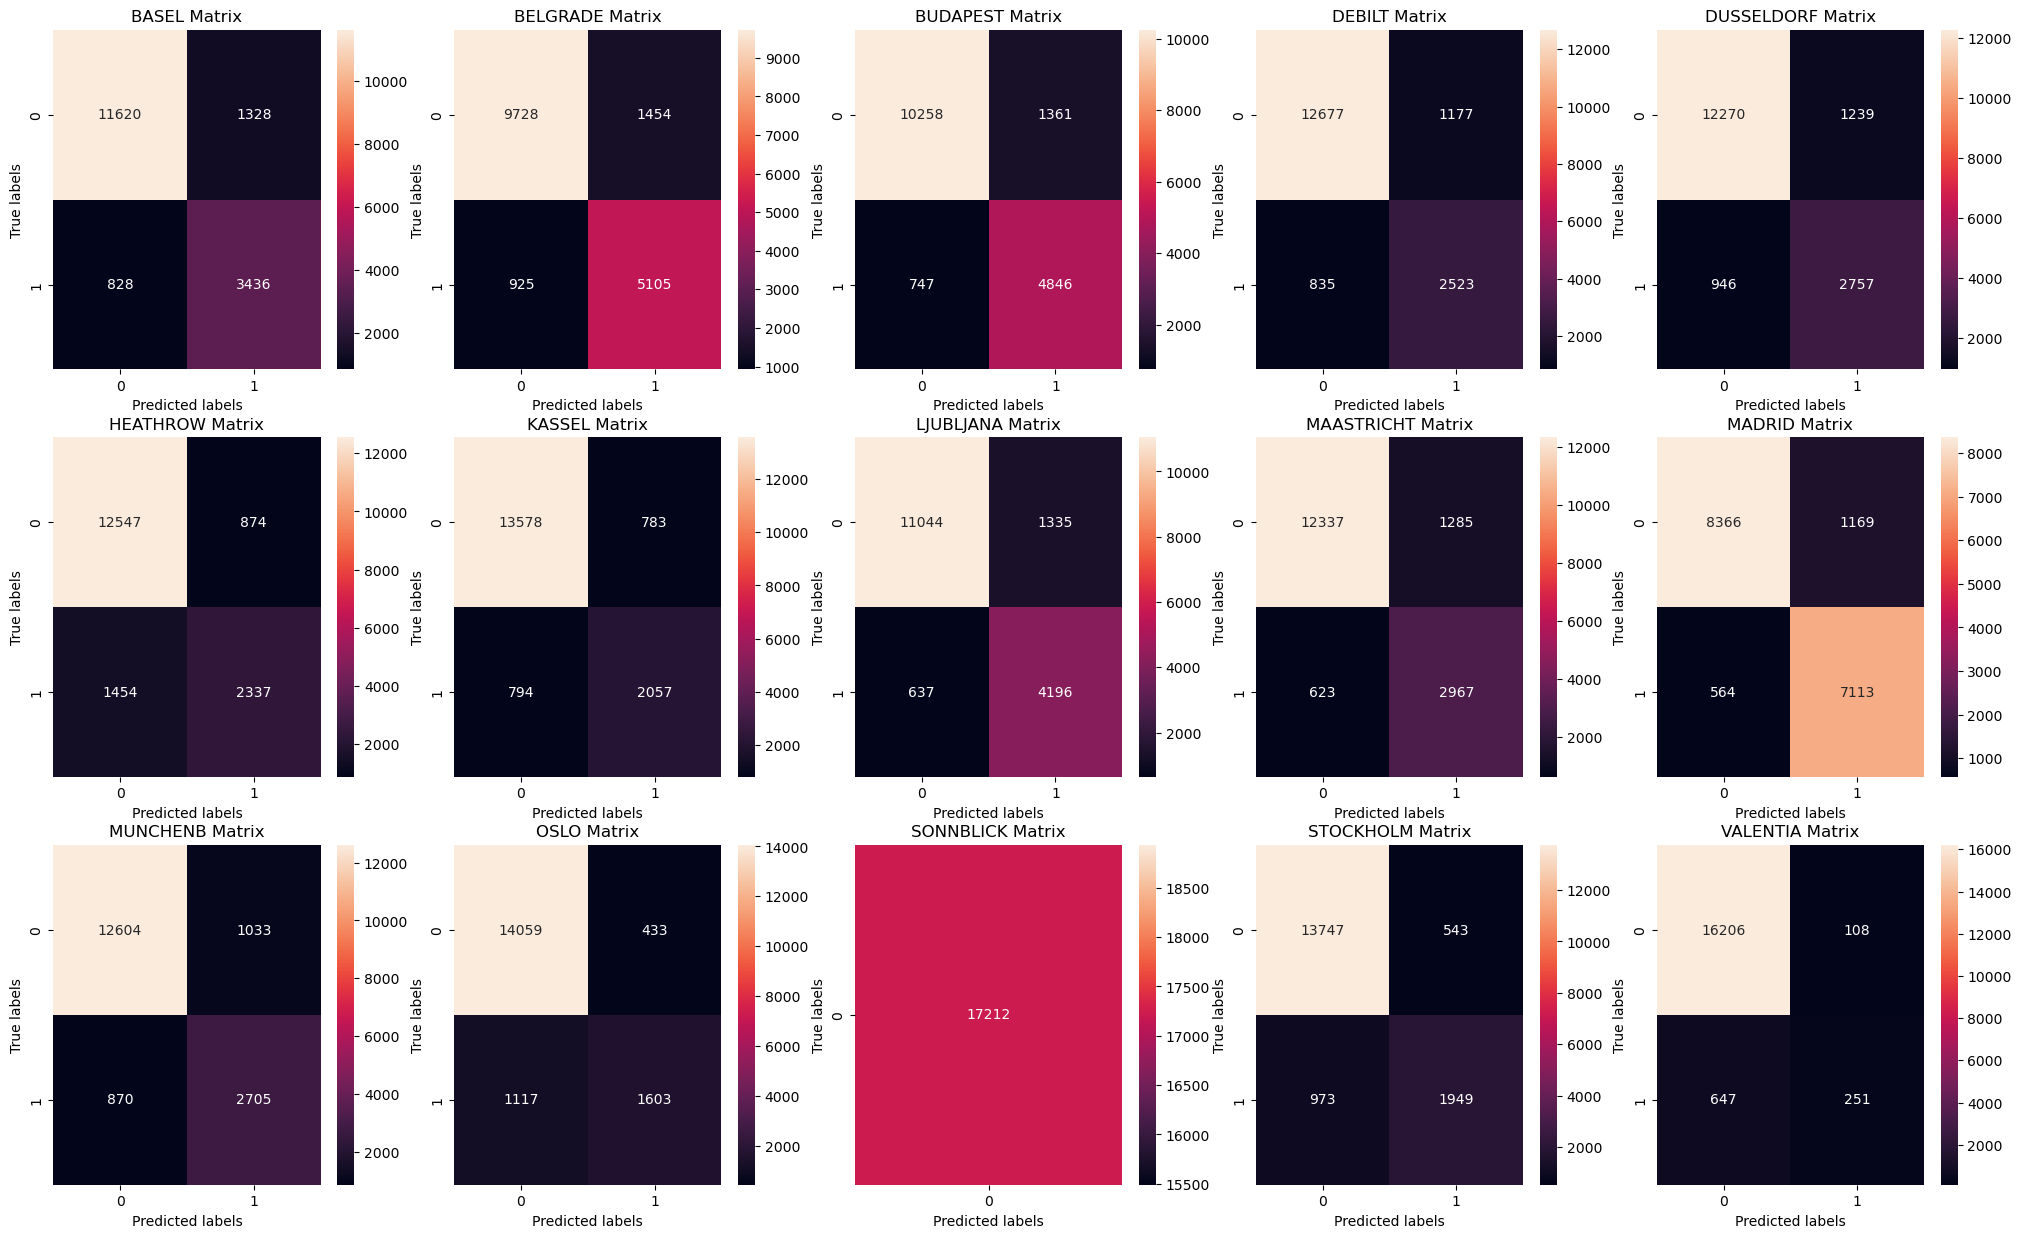

In [126]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


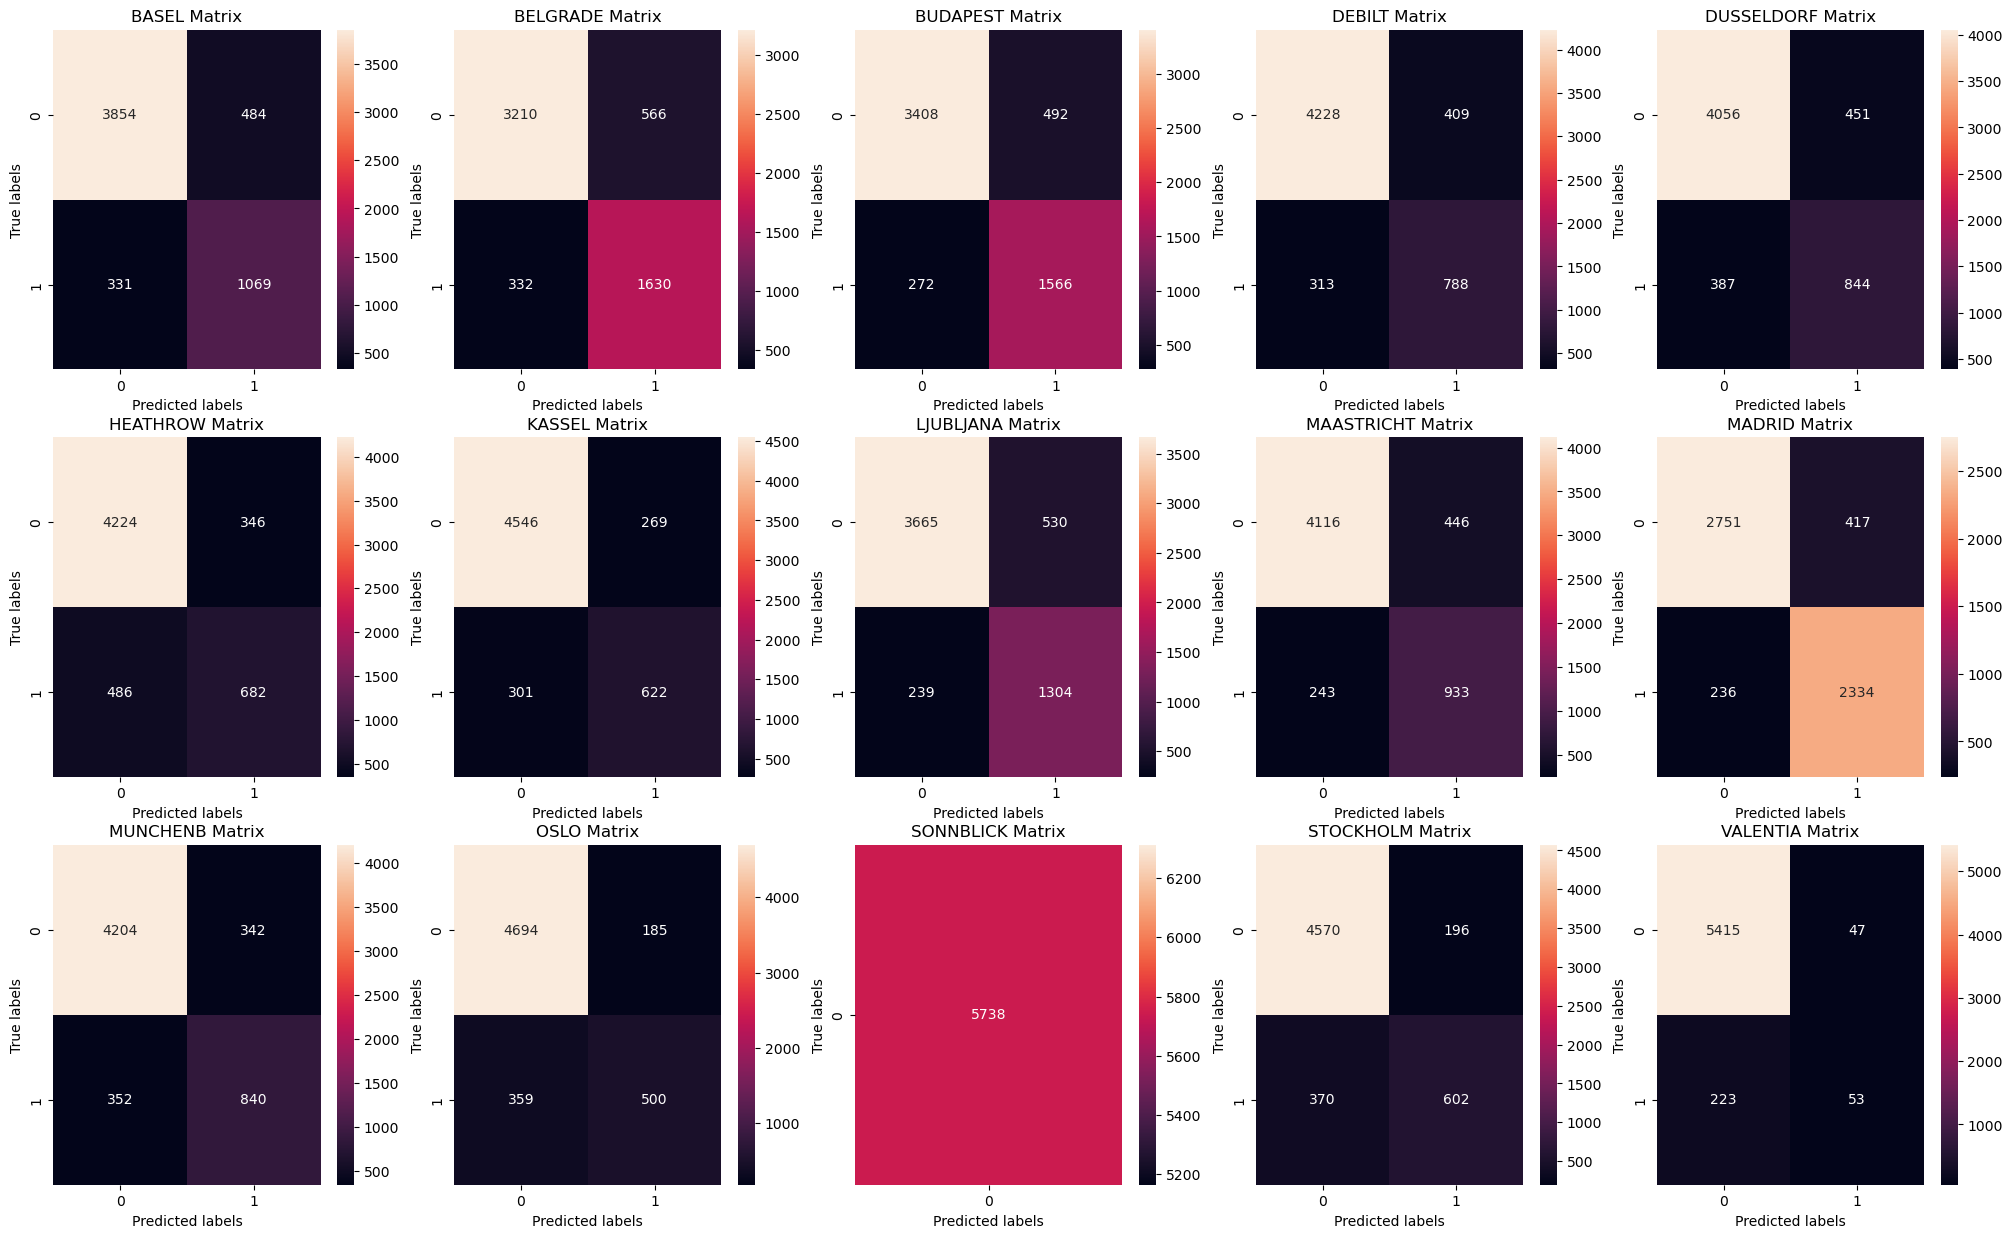

In [127]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

# ANN 3

In [135]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(500, 250, 100), max_iter=500, tol=0.01)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(500, 250, 100), max_iter=500, tol=0.01)

In [136]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5841273530095282
0.42628093412338797


In [ ]:
#Better, But still not great

In [137]:
print(y_pred_test.shape)
print(y_test.shape)
print(y_pred.shape)
print(y_train.shape)

(5738, 15)
(5738, 15)
(17212, 15)
(17212, 15)


In [138]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


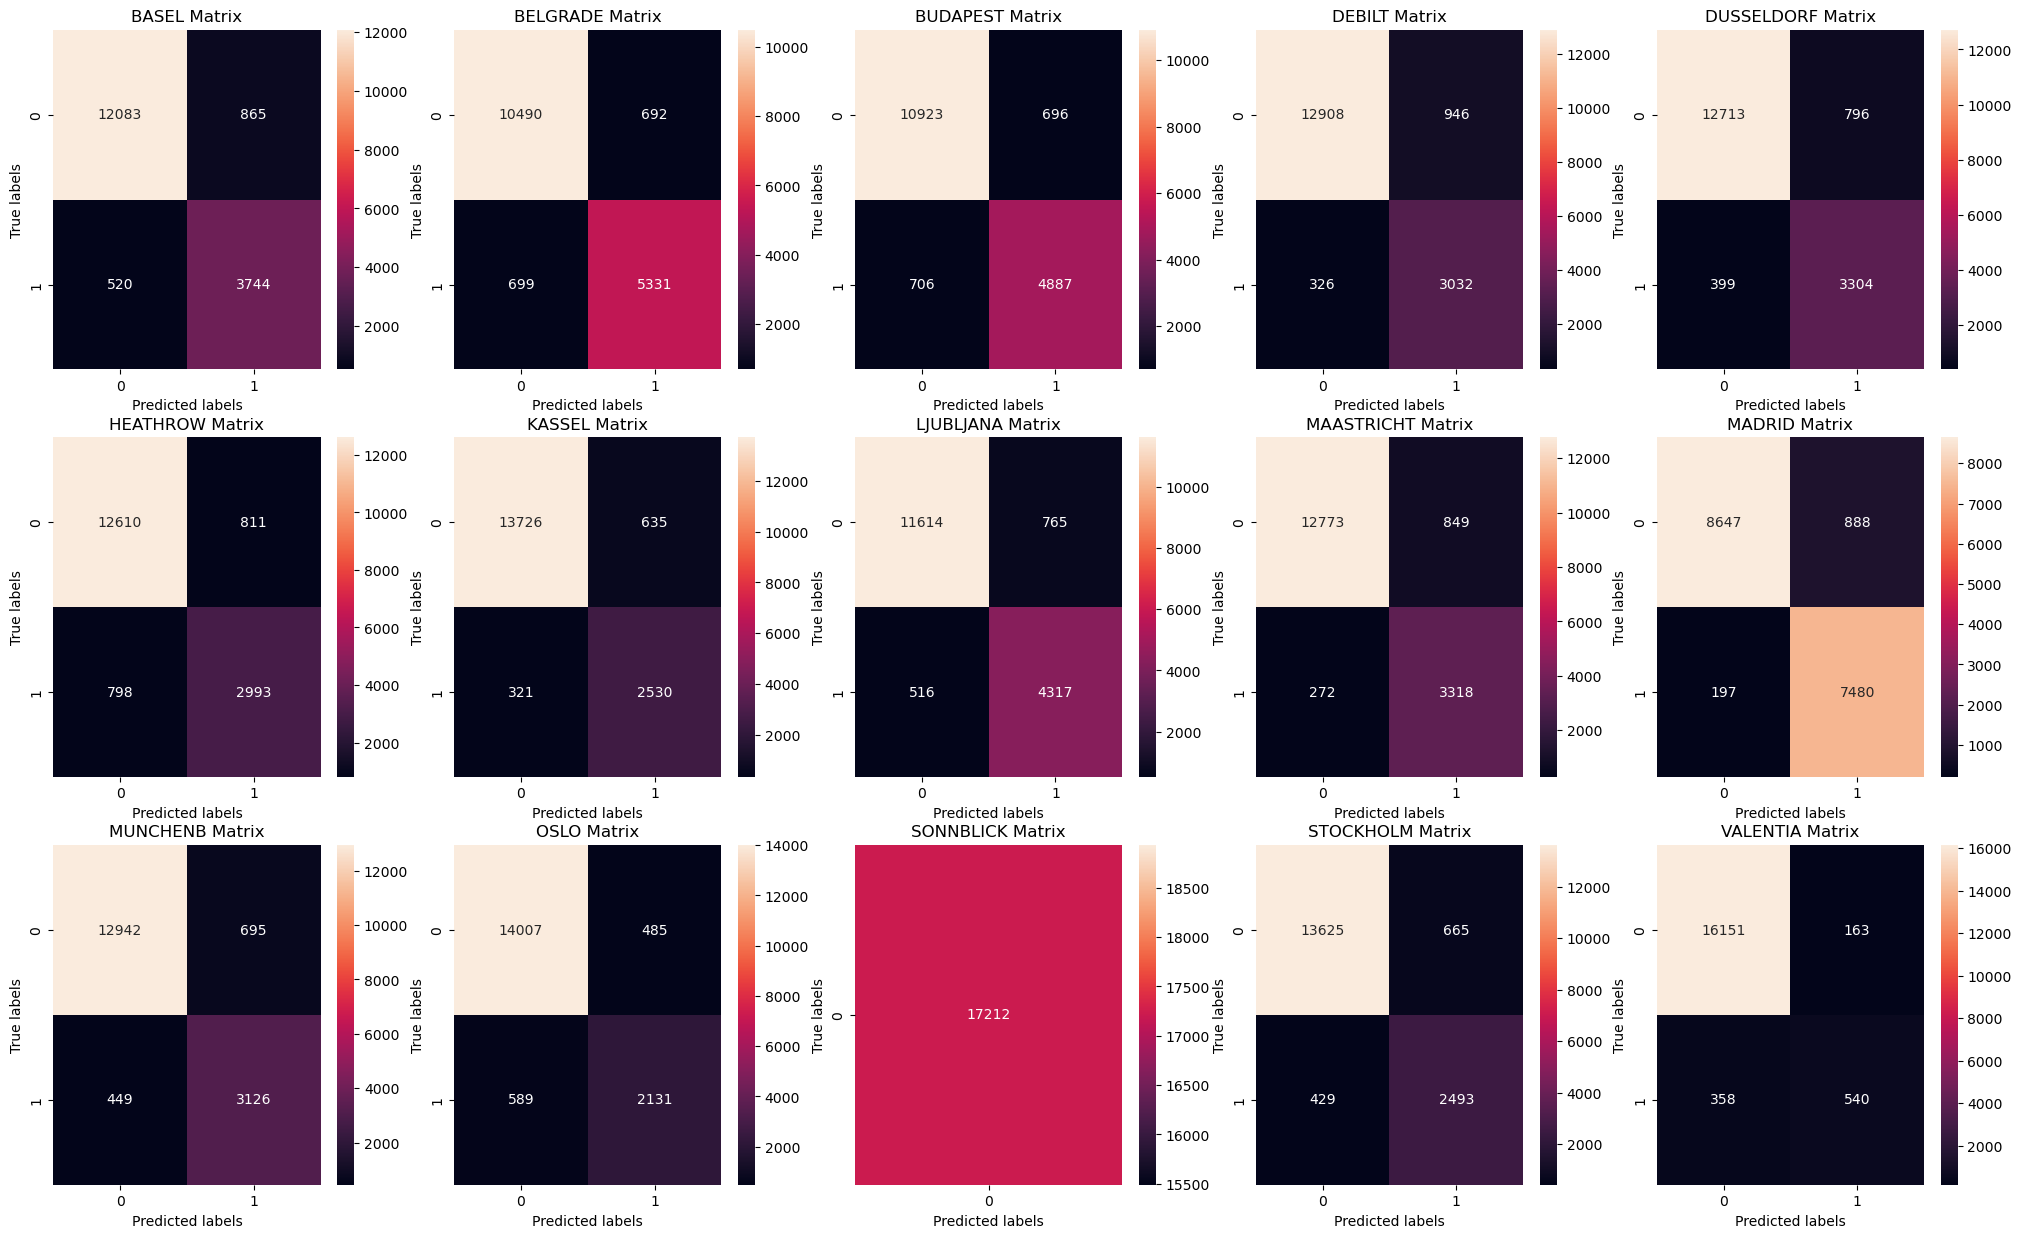

In [139]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


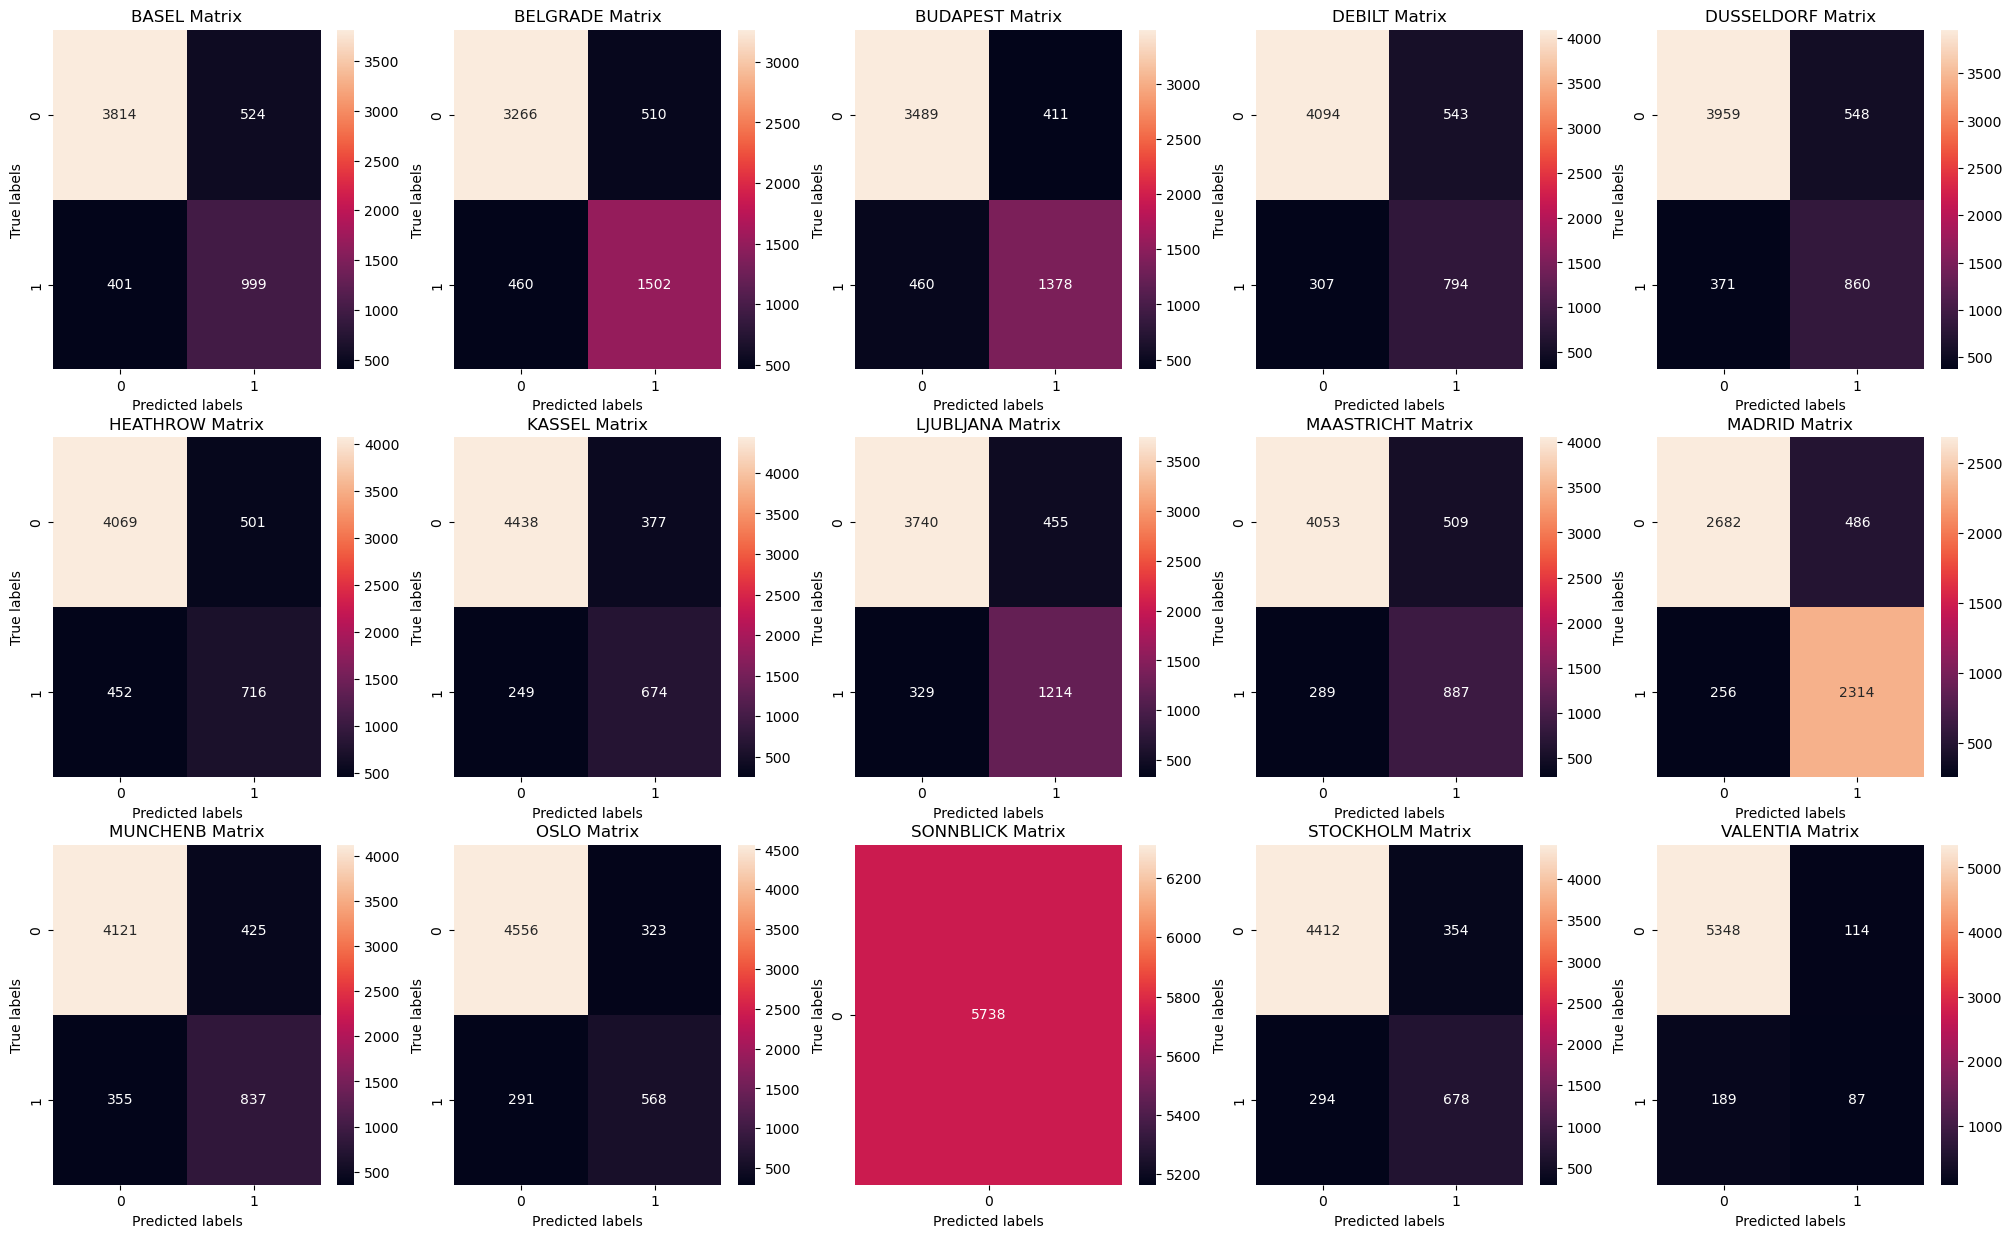

In [140]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1